# Beam size, divergence and coherent fraction

In [1]:
import numpy
from scipy.constants import c, e, h, pi
from numpy import sqrt, exp
from scipy.special import erf
import matplotlib.pyplot as plt

In [126]:
# electron beam properties (ALS-U)
lightsource_name = "ALS-U"
sex_m = 12.12e-6
sey_m = 14.73e-6
sexp_rad = 5.7e-6
seyp_rad = 4.7e-6

# fractional energy spread
se = 0.00102 # ALS-U (from E Wallen)

In [43]:
# electron beam properties (ALS)
lightsource_name = "ALS"
sex_m = 251e-6
sey_m = 8.3e-6
sexp_rad = 9.7e-6
seyp_rad = 4.8e-6

se = 0.95e-3  # ALS (from CDR ID beamline)

In [35]:
# undulator properties (COSMIC)
undulator_name = "COSMIC"
# m is harmonic number
m = 1
# N is number of periods
N = 54
# undulator_period_m = = 38e-3
undulator_L_m = 2.052

In [26]:
# undulator properties (QERLIN)
undulator_name = "QERLIN"
# m is harmonic number
m = 1
# N is number of periods
N = 52.5
# undulator_period_m = = 38e-3
undulator_L_m = 1.838

In [127]:
# Compute beam size
ph_energy_eV = numpy.arange(30, 2500, 1)
wavelength_m = (h*c/e)/ph_energy_eV

# electron dispersion contribution
#x = 2*pi*m*N*se
Qa = lambda x: sqrt(2*x**2/(exp(-2*x**2)+sqrt(2*pi)*x*erf(sqrt(2)*x)-1))

# Diffraction-limited beam size HP definition
sp_m    = 1/(2*pi)*sqrt(2*wavelength_m*undulator_L_m)
spp_rad =          sqrt(wavelength_m/(2*undulator_L_m))*Qa(2*pi*m*N*se)

# beam size and divergence (convolution through sum of gaussian)
Sx_m  = numpy.sqrt(sex_m**2+sp_m**2)
Sy_m  = numpy.sqrt(sey_m**2+sp_m**2)
Sxp_rad = numpy.sqrt(sexp_rad**2+spp_rad**2)
Syp_rad = numpy.sqrt(seyp_rad**2+spp_rad**2)

In [45]:
# display information
idx = numpy.where(ph_energy_eV==260)
print("light source: "+lightsource_name)
print(" undulator type: "+undulator_name)
print(" Undulator length: {:.3f}m".format(undulator_L_m,format_spec="3.3f"))
print("  Energy ({:.0f}eV)".format(float(ph_energy_eV[idx]),format_spec="3.0f"))
print("   beam size (x):       {:.1f}um".format(float(Sx_m[idx]*1e6),format_spec="3.1f"))
print("   beam size (y):       {:.1f}um".format(float(Sy_m[idx]*1e6),format_spec="3.1f"))
print("   beam divergence (x): {:.1f}urad".format(float(Sxp_rad[idx]*1e6),format_spec="3.1f"))
print("   beam divergence (y): {:.1f}urad".format(float(Syp_rad[idx]*1e6),format_spec="3.1f"))

light source: ALS
 undulator type: COSMIC
 Undulator length: 2.052m
  Energy (260eV)
   beam size (x):       252.0um
   beam size (y):       23.8um
   beam divergence (x): 36.0urad
   beam divergence (y): 35.0urad


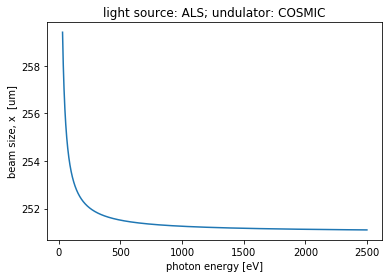

In [46]:
plt.cla()
plt.plot(ph_energy_eV,Sx_m*1e6)
plt.title("light source: "+lightsource_name+ "; undulator: "+undulator_name )
plt.xlabel('photon energy [eV]')
plt.ylabel('beam size, x  [um]')
plt.show()

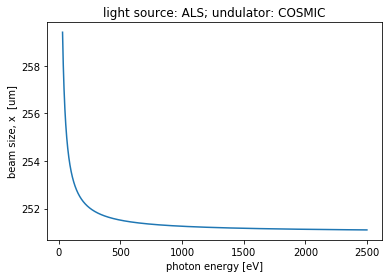

In [47]:
plt.cla()
plt.plot(ph_energy_eV,Sx_m*1e6)
plt.title("light source: "+lightsource_name+ "; undulator: "+undulator_name )
plt.xlabel('photon energy [eV]')
plt.ylabel('beam size, x  [um]')
plt.show()

In [1]:
'''sxu = Sx_m
syu = Sy_m
sxup = Sxp_rad
syup = Syp_rad
'''

'sxu = Sx_m\nsyu = Sy_m\nsxup = Sxp_rad\nsyup = Syp_rad\n'

In [2]:
'''
plt.cla()
ax1, = plt.plot(ph_energy_eV, Syp_rad*1e6)#, ph_energy_eV,sxu*1e6)
ax2, = plt.plot(ph_energy_eV, syup*1e6)#, ph_energy_eV,sxu*1e6)
plt.xlabel('photon energy [eV]')
plt.ylabel('beam divergence, y  [urad]')
plt.ylim((0,50))
plt.legend([ax1, ax2],['ALS', 'ALS-U'])
plt.title('COSMIC undulator')
plt.show()
'''

"\nplt.cla()\nax1, = plt.plot(ph_energy_eV, Syp_rad*1e6)#, ph_energy_eV,sxu*1e6)\nax2, = plt.plot(ph_energy_eV, syup*1e6)#, ph_energy_eV,sxu*1e6)\nplt.xlabel('photon energy [eV]')\nplt.ylabel('beam divergence, y  [urad]')\nplt.ylim((0,50))\nplt.legend([ax1, ax2],['ALS', 'ALS-U'])\nplt.title('COSMIC undulator')\nplt.show()\n"

In [123]:
'''plt.plot(ph_energy_eV, Sx_m/sxu)#, ph_energy_eV,sxu*1e6)
plt.xlabel('photon energy [eV]')
plt.ylabel('ALS/ALS-U horizontal beam size ratio')
plt.ylim((0,25))
plt.xticks((30,  250, 1000, 2500))
plt.grid()
plt.title('COSMIC undulator')
#plt.savefig('ratio.png',dpi=300,transparent=True)
plt.show()
'''

Text(0.5,1,'COSMIC undulator')

In [129]:
#coherent fraction
cf = 1/numpy.sqrt(
    (1+(sex_m/sp_m)**2)*(1+(sey_m/sp_m)**2)*(1+(sexp_rad/spp_rad)**2)*(1+(seyp_rad/spp_rad)**2))

In [137]:
plt.cla()
plt.plot(ph_energy_eV, cf)#, ph_energy_eV,sxu*1e6)
plt.xlabel('photon energy [eV]')
plt.ylabel('ALS-U coherent fraction')
plt.ylim((0,1))
plt.xticks((30,  250, 1000, 2500))
plt.grid()
plt.title('COSMIC undulator')
#plt.savefig('coherent_fraction.png',dpi=300,transparent=True)
plt.show()